In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [4]:
df = pd.read_csv("D:\study\ML\Social_Network_Ads.csv")

In [5]:
df.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [6]:
df = df.iloc[:,2:]

In [7]:
df.head()

,Age,EstimatedSalary,Purchased
0,19,19000,0
1,35,20000,0
2,26,43000,0
3,27,57000,0
4,19,76000,0


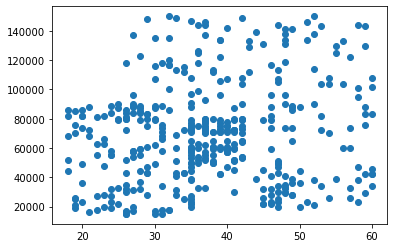

In [8]:
plt.scatter(df.iloc[:,0],df.iloc[:,1])

In [9]:
x = df.iloc[:,:2]
y = df.iloc[:,-1]

In [10]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=2)

C:\Users\User\anaconda3\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.26.2
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [14]:
import tensorflow as tf
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense

In [17]:
model = Sequential()

model.add(Dense(128,activation='relu',input_dim=2))
model.add(Dense(1,activation='sigmoid'))

In [18]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 128)               384       
                                                                 
 dense_1 (Dense)             (None, 1)                 129       
                                                                 
Total params: 513 (2.00 KB)
Trainable params: 513 (2.00 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [19]:
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

In [22]:
history = model.fit(x_train,y_train,validation_data=(x_test,y_test),epochs=100)

Epoch 1/100
10/10 [==============================] - 0s 10ms/step - loss: 45.3913 - accuracy: 0.4719 - val_loss: 111.5880 - val_accuracy: 0.6000
Epoch 2/100
10/10 [==============================] - 0s 6ms/step - loss: 51.1315 - accuracy: 0.5344 - val_loss: 52.6252 - val_accuracy: 0.4000
Epoch 3/100
10/10 [==============================] - 0s 6ms/step - loss: 61.5699 - accuracy: 0.5031 - val_loss: 22.7676 - val_accuracy: 0.6000
Epoch 4/100
10/10 [==============================] - 0s 6ms/step - loss: 67.2749 - accuracy: 0.4656 - val_loss: 14.2094 - val_accuracy: 0.4000
Epoch 5/100
10/10 [==============================] - 0s 5ms/step - loss: 140.7145 - accuracy: 0.5156 - val_loss: 66.0360 - val_accuracy: 0.4000
Epoch 6/100
10/10 [==============================] - 0s 6ms/step - loss: 57.7565 - accuracy: 0.5156 - val_loss: 68.2254 - val_accuracy: 0.6000
Epoch 7/100
10/10 [==============================] - 0s 6ms/step - loss: 37.3188 - accuracy: 0.5281 - val_loss: 62.1665 - val_accuracy: 0.6

Epoch 58/100
10/10 [==============================] - 0s 5ms/step - loss: 52.9377 - accuracy: 0.5063 - val_loss: 55.7248 - val_accuracy: 0.6000
Epoch 59/100
10/10 [==============================] - 0s 5ms/step - loss: 92.6806 - accuracy: 0.5031 - val_loss: 19.1831 - val_accuracy: 0.4000
Epoch 60/100
10/10 [==============================] - 0s 5ms/step - loss: 37.6625 - accuracy: 0.4719 - val_loss: 47.4540 - val_accuracy: 0.4000
Epoch 61/100
10/10 [==============================] - 0s 5ms/step - loss: 49.0578 - accuracy: 0.5094 - val_loss: 58.0883 - val_accuracy: 0.6000
Epoch 62/100
10/10 [==============================] - 0s 5ms/step - loss: 56.4749 - accuracy: 0.5344 - val_loss: 21.2430 - val_accuracy: 0.4000
Epoch 63/100
10/10 [==============================] - 0s 6ms/step - loss: 15.6096 - accuracy: 0.5750 - val_loss: 46.5233 - val_accuracy: 0.6000
Epoch 64/100
10/10 [==============================] - 0s 6ms/step - loss: 48.9533 - accuracy: 0.4469 - val_loss: 32.9094 - val_accuracy:

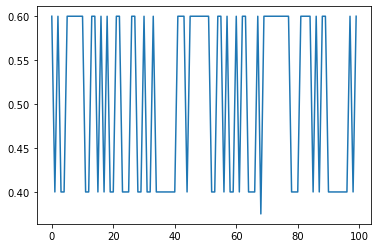

In [23]:
plt.plot(history.history['val_accuracy'])

val accuracy is very unstable and jumpig between 40 and 60 ---> this is due to unscaled data 

# Applying Scaling

In [25]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

In [26]:
model = Sequential()

model.add(Dense(128,activation='relu',input_dim=2))
model.add(Dense(1,activation='sigmoid'))

In [27]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_2 (Dense)             (None, 128)               384       
                                                                 
 dense_3 (Dense)             (None, 1)                 129       
                                                                 
Total params: 513 (2.00 KB)
Trainable params: 513 (2.00 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [28]:
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

In [29]:
history = model.fit(x_train_scaled,y_train,validation_data=(x_test_scaled,y_test),epochs=100)

Epoch 1/100
10/10 [==============================] - 1s 19ms/step - loss: 0.6860 - accuracy: 0.6438 - val_loss: 0.6593 - val_accuracy: 0.6500
Epoch 2/100
10/10 [==============================] - 0s 6ms/step - loss: 0.6310 - accuracy: 0.7000 - val_loss: 0.6017 - val_accuracy: 0.7250
Epoch 3/100
10/10 [==============================] - 0s 5ms/step - loss: 0.5825 - accuracy: 0.7781 - val_loss: 0.5547 - val_accuracy: 0.7625
Epoch 4/100
10/10 [==============================] - 0s 5ms/step - loss: 0.5425 - accuracy: 0.7969 - val_loss: 0.5143 - val_accuracy: 0.7750
Epoch 5/100
10/10 [==============================] - 0s 6ms/step - loss: 0.5070 - accuracy: 0.8031 - val_loss: 0.4794 - val_accuracy: 0.7875
Epoch 6/100
10/10 [==============================] - 0s 5ms/step - loss: 0.4768 - accuracy: 0.8094 - val_loss: 0.4495 - val_accuracy: 0.7875
Epoch 7/100
10/10 [==============================] - 0s 6ms/step - loss: 0.4494 - accuracy: 0.8156 - val_loss: 0.4244 - val_accuracy: 0.7875
Epoch 8/100


Epoch 59/100
10/10 [==============================] - 0s 5ms/step - loss: 0.2386 - accuracy: 0.9031 - val_loss: 0.2678 - val_accuracy: 0.8875
Epoch 60/100
10/10 [==============================] - 0s 5ms/step - loss: 0.2378 - accuracy: 0.9031 - val_loss: 0.2706 - val_accuracy: 0.8750
Epoch 61/100
10/10 [==============================] - 0s 5ms/step - loss: 0.2380 - accuracy: 0.9000 - val_loss: 0.2711 - val_accuracy: 0.8875
Epoch 62/100
10/10 [==============================] - 0s 5ms/step - loss: 0.2374 - accuracy: 0.9000 - val_loss: 0.2709 - val_accuracy: 0.8750
Epoch 63/100
10/10 [==============================] - 0s 5ms/step - loss: 0.2374 - accuracy: 0.9000 - val_loss: 0.2719 - val_accuracy: 0.8750
Epoch 64/100
10/10 [==============================] - 0s 5ms/step - loss: 0.2372 - accuracy: 0.9000 - val_loss: 0.2688 - val_accuracy: 0.8750
Epoch 65/100
10/10 [==============================] - 0s 5ms/step - loss: 0.2364 - accuracy: 0.9031 - val_loss: 0.2679 - val_accuracy: 0.9000
Epoch 

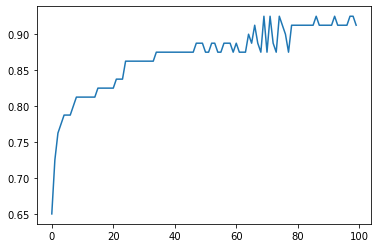

In [30]:
plt.plot(history.history['val_accuracy'])

After scaling the data the val_accuracy does not ossilate and increases.